In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [39]:
# Read in the county's parcel data
# note this is not just ann arbor, but all of washtenaw county
parcels = gpd.read_file('../data/ann_arbor_parcel_data/County_Parcels/Parcels.shp')

# read the landuse data
landuse = gpd.read_file('../data/ann_arbor_parcel_data/AA_LandUse/AA_LandUse.shp')

# Read in the city boundary for ann arbor
aa_boundary = gpd.read_file('../data/ann_arbor_parcel_data/AA_City_Boundary/AA_City_Boundary.shp')

In [40]:
parcels.head()

,Shape_Leng,Shape_Area,geometry
0,275.316286,2193.919055,"POLYGON ((13216389.540 302943.880, 13216393.51..."
1,262.841948,2153.441468,"POLYGON ((13216175.290 302943.140, 13216232.96..."
2,201.949520,1841.814922,"POLYGON ((13216389.540 302943.880, 13216333.13..."
3,223.625156,1813.474887,"POLYGON ((13216204.500 302971.500, 13216203.42..."
4,205.431444,1836.934951,"POLYGON ((13216395.100 302976.200, 13216353.73..."


<AxesSubplot: >

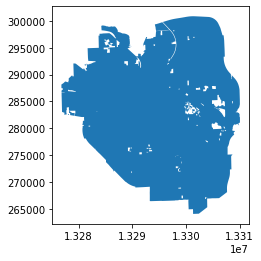

In [41]:
# look at the ann arbor boundary
aa_boundary.plot()

In [42]:
landuse

,LANDUSECOD,LANDUSE,GROUP_,Acres,Shape_Leng,Shape_Area,geometry
0,110.0,Single Family,Residential,10.024828,5058.735584,436681.512744,"POLYGON ((13299054.564 300573.988, 13299119.59..."
1,110.0,Single Family,Residential,5.603165,3178.530538,244073.882031,"POLYGON ((13300207.926 300212.020, 13300215.29..."
2,720.0,Outdoor,Recreation,18.474688,7587.403704,804757.418520,"POLYGON ((13300435.440 299269.321, 13300410.20..."
3,110.0,Single Family,Residential,3.901063,3136.565550,169930.303142,"POLYGON ((13300242.376 299191.658, 13300247.96..."
4,800.0,Vacant,Vacant,1.219658,1079.591187,53128.323400,"POLYGON ((13298839.774 298477.586, 13298502.29..."
...,...,...,...,...,...,...,...
5101,210.0,Prof./General,Office,1.424417,1087.848688,62047.612299,"POLYGON ((13293376.047 275324.030, 13293145.05..."
5102,720.0,Outdoor,Recreation,0.072163,264.185481,3143.420790,"POLYGON ((13288958.861 279424.599, 13289018.28..."
5103,530.0,Road Transportation,Transportation/Communication/Utilities,1.187545,1453.510866,51729.469659,"POLYGON ((13289824.851 272583.756, 13290470.49..."
5104,530.0,Road Transportation,Transportation/Communication/Utilities,0.065376,405.388668,2847.765041,"POLYGON ((13306413.353 276060.772, 13306433.35..."


In [43]:
# now we can use the boundary to select only the parcels that are in ann arbor
aa_parcels = gpd.sjoin(parcels, aa_boundary, how='inner', op='intersects')
aa_parcels = aa_parcels[['Shape_Leng_left', 'Shape_Area_left', 'geometry', 'FIPS']]

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [44]:
# look at the ann arbor parcels df
aa_parcels

,Shape_Leng_left,Shape_Area_left,geometry,FIPS
4127,1639.800587,129526.386045,"POLYGON ((13280163.750 289849.550, 13280265.89...",26-03000
4128,3437.467967,518717.598100,"POLYGON ((13280743.212 290424.141, 13280791.79...",26-03000
4129,371.775577,7909.667054,"POLYGON ((13280779.362 289525.469, 13280755.54...",26-03000
4130,370.222922,7671.923272,"POLYGON ((13280789.022 289528.929, 13280779.36...",26-03000
4131,365.601344,7368.329315,"POLYGON ((13280849.142 289686.550, 13280849.98...",26-03000
...,...,...,...,...
102225,1770.608187,148565.127005,"POLYGON ((13294661.389 266498.710, 13295321.40...",26-03000
102226,2036.972424,250742.898244,"POLYGON ((13293743.992 266054.674, 13293731.64...",26-03000
102227,2234.804270,299161.376800,"POLYGON ((13295510.155 265860.439, 13295488.32...",26-03000
102228,1492.800331,132923.540719,"POLYGON ((13293492.757 266047.220, 13293344.99...",26-03000


In [45]:
# use the "overlay" function in geopandas to overlay parcels on landuse and get the landuse for each parcel
from geopandas.tools import overlay
aa_parcels_landuse = gpd.overlay(aa_parcels, landuse, how='intersection')

In [46]:
# we filter again just to make sure everything is within Ann Arbor city boundary
aa_parcels_landuse = gpd.sjoin(aa_parcels_landuse, aa_boundary, how='inner', op='intersects')

# then we only select useful columns
aa_parcels_landuse = aa_parcels_landuse[['geometry', 'FIPS_left', 'LANDUSE']]

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/Applications/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1470: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Shape_Area_left', 'Shape_Leng_left'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


In [47]:
aa_parcels_landuse

,geometry,FIPS_left,LANDUSE
0,"POLYGON ((13280163.750 289849.550, 13280163.80...",26-03000,Single Family
1,"POLYGON ((13280163.802 289849.359, 13280163.75...",26-03000,Single Family
2,"POLYGON ((13280251.401 289991.500, 13280294.42...",26-03000,Single Family
3,"POLYGON ((13280214.490 290038.690, 13280251.40...",26-03000,Single Family
4,"POLYGON ((13280181.940 290090.740, 13280189.13...",26-03000,Single Family
...,...,...,...
43581,"POLYGON ((13309089.433 280731.679, 13309083.32...",26-03000,Vacant
43582,"POLYGON ((13309082.546 280757.047, 13309083.32...",26-03000,Vacant
43583,"POLYGON ((13298906.460 272555.280, 13298886.28...",26-03000,Vacant
43584,"POLYGON ((13293490.425 275717.199, 13293146.92...",26-03000,General Retail


In [48]:
# just check and see if there is any null landuse
aa_parcels_landuse['LANDUSE'].isnull().sum()

0

In [49]:
# all possible landuse types
aa_parcels_landuse['LANDUSE'].unique()

array(['Single Family', 'Outdoor', 'Education', 'Assisted Living',
       'Two Family', 'Multiple Family', 'General Retail', 'Vacant',
       'Prof./General', 'Auto Sales/Service', 'Religious', 'Medical',
       'Residential/Non-Residential Mixed', 'Parking', 'Warehousing',
       'Communication Facilities', 'Hotel/Motel', 'Non-Residential Mixed',
       'Personal Service', 'Financial/Bank', 'Restaurant', 'Cemetery',
       'Trade Retail', 'Utility Facilities', 'Road Transportation',
       'Government', 'Research', 'Cultural', 'Mixed Use', 'Organizations',
       'Heavy Manufacturing', 'Light Assembly', 'Indoor', 'Group Housing',
       'Railroad', 'Assembly', 'Non-Manufacturing', 'Hospital',
       'Bed & Breakfast', 'Institution', 'Entertainment',
       'Local Transportation', 'Wholesale', 'Mobile Home Park', 'General'],
      dtype=object)

In [50]:
mapp_dict = {
    'Assisted Living': 'Residential',
    'Group Housing': 'Residential',
    'Two Family': 'Residential',
    'Single Family': 'Residential',
    'Multiple Family': 'Residential',
    'Residential/Non-Residential': 'Residential',
    'Mobile Home Park': 'Residential',
    'Outdoor': 'Not-of-Interest',
    'Education': 'Education&Culture',
    'General Retail': 'Commercial',
    'Vacant': 'Not-of-Interest',
    'Prof./General': 'Not-of-Interest',
    'Auto Sales/Service': 'Commercial',
    'Religious': 'Education&Culture',
    'Medical': 'Medical',
    'Parking': 'Transportation',
    'Warehousing': 'Commercial',
    'Communication Facilities': 'Not-of-Interest',
    'Hotel/Motel': 'Restaurant&Hospitality',
    'Non-Residential Mixed': 'Mixed',
    'Personal Service': 'Commercial',
    'Financial/Bank': 'Commercial',
    'Restaurant': 'Restaurant&Hospitality',
    'Cemetery': 'Not-of-Interest',
    'Trade Retail': 'Commercial',
    'Utility Facilities': 'Not-of-Interest',
    'Road Transportation': 'Transportation',
    'Government': 'Government',
    'Research': 'Education&Culture',
    'Cultural': 'Education&Culture',
    'Mixed Use': 'Mixed',
    'Organizations': 'Not-of-Interest',
    'Heavy Manufacturing': 'Industrial',
    'Light Assembly': 'Industrial',
    'Indoor': 'Not-of-Interest',
    'Railroad': 'Transportation',
    'Assembly': 'Industrial',
    'Non-Manufacturing': 'Industrial',
    'Hospital': 'Medical',
    'Bed & Breakfast': 'Restaurant&Hospitality',
    'Institution': 'Education&Culture',
    'Entertainment': 'Restaurant&Hospitality',
    'Local Transportation': 'Transportation',
    'Whole Sale': 'Commercial',
    'General': 'Not-of-Interest'
}

In [51]:
# Map the landuse columns to the categories dict we defined above
aa_parcels_landuse['LANDUSE'] = aa_parcels_landuse['LANDUSE'].map(mapp_dict)

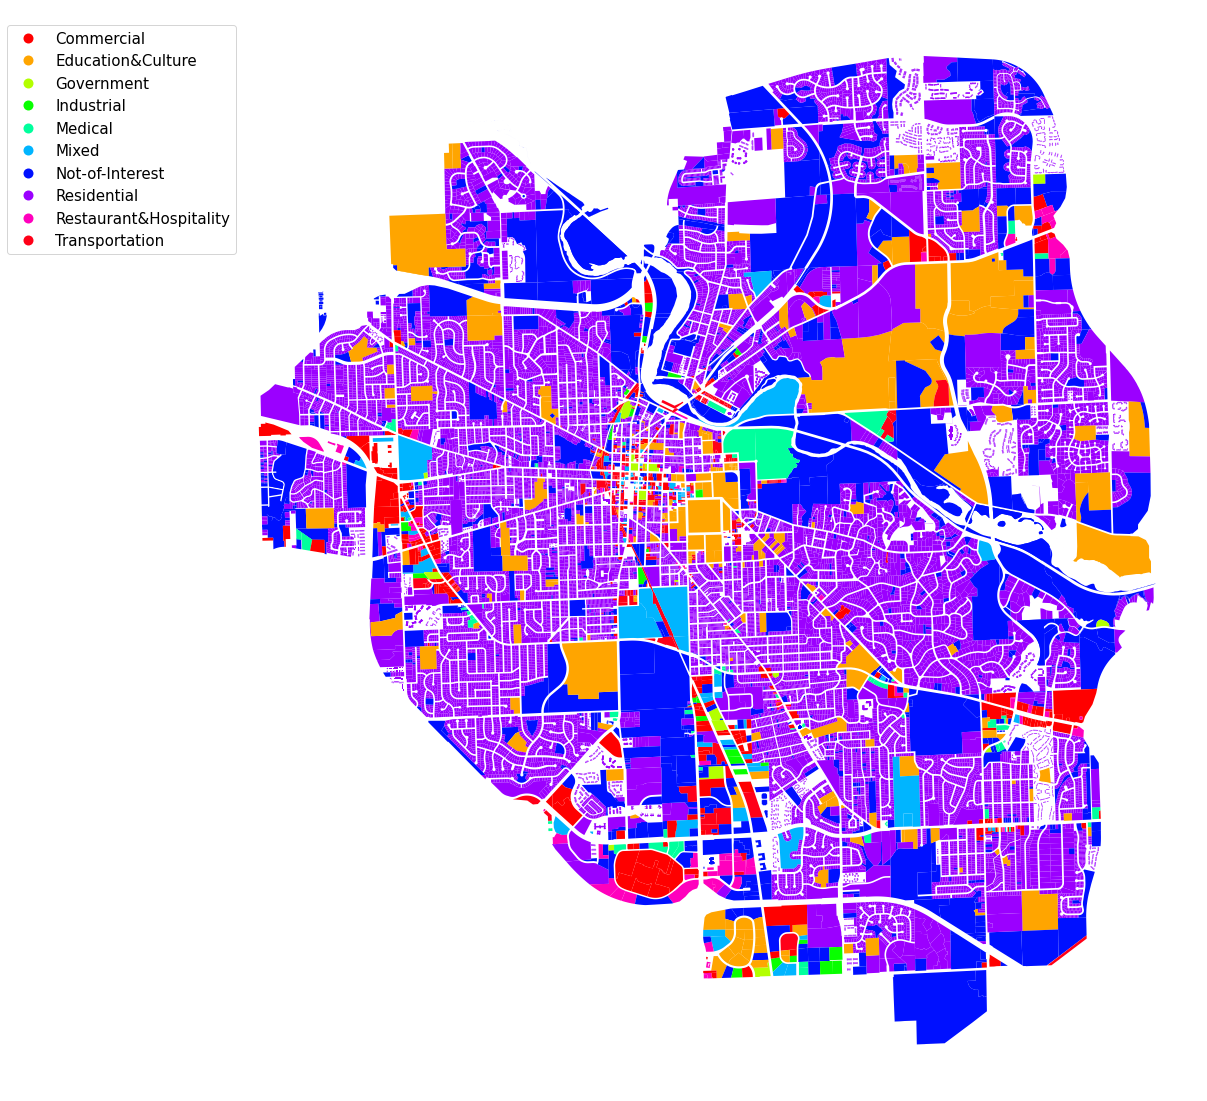

In [52]:
ax = aa_parcels_landuse.plot(
    column = 'LANDUSE', cmap = "hsv", 
    figsize = (20,20), legend=True,
    legend_kwds={'bbox_to_anchor':(0.03,0.99), 'fontsize': 15}
)
ax.set_axis_off()

In [53]:
# rename the columns of aa_parcels_landuse
aa_parcels_landuse.columns = ['geometry', 'FIPS', 'Landuse']

In [54]:
aa_parcels_landuse

,geometry,FIPS,Landuse
0,"POLYGON ((13280163.750 289849.550, 13280163.80...",26-03000,Residential
1,"POLYGON ((13280163.802 289849.359, 13280163.75...",26-03000,Residential
2,"POLYGON ((13280251.401 289991.500, 13280294.42...",26-03000,Residential
3,"POLYGON ((13280214.490 290038.690, 13280251.40...",26-03000,Residential
4,"POLYGON ((13280181.940 290090.740, 13280189.13...",26-03000,Residential
...,...,...,...
43581,"POLYGON ((13309089.433 280731.679, 13309083.32...",26-03000,Not-of-Interest
43582,"POLYGON ((13309082.546 280757.047, 13309083.32...",26-03000,Not-of-Interest
43583,"POLYGON ((13298906.460 272555.280, 13298886.28...",26-03000,Not-of-Interest
43584,"POLYGON ((13293490.425 275717.199, 13293146.92...",26-03000,Commercial


In [55]:
# save the parcel data as a shapefile
aa_parcels_landuse.dtypes

geometry    geometry
FIPS          object
Landuse       object
dtype: object

In [57]:
# save as a geojson
aa_parcels_landuse.to_file('../data/ann_arbor_parcel_data/aa_parcels_landuse.geojson', driver='GeoJSON')